# CIANA S RAJ 
## GRIP DECEMBER 2022

# Importing the libraries

In [1]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline


# load the datasets

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [6]:
df=pd.read_csv(url)

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.shape

(25, 2)

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
df.cov()

,Hours,Scores
Hours,6.3761,62.331500
Scores,62.3315,639.426667


# Visualisation

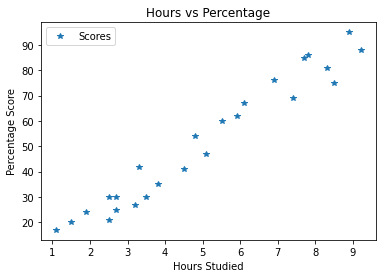

In [14]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [15]:

#we can see that there is a positive linear relation between the number of hours studied and percentage of score.

# Linear Regression Model

In [16]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)



# Training the model

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

model = lr.fit(X_train,y_train)

In [28]:
y_pred=model.predict(X_test)

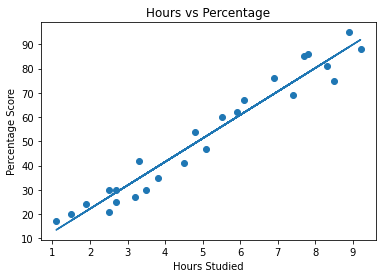

In [29]:

# Plotting the regression line
line = lr.coef_*X+lr.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# checking the accuracy score for training and test

In [30]:
print('Training score')
print(lr.score(X_train,y_train))

print('Test score')
print(lr.score(X_test,y_test))

Training score
0.9491209376364416
Test score
0.9678055545167994


In [21]:
y_test #real value

array([81, 30, 21, 76, 62], dtype=int64)

In [22]:
y_pred #predicted value

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [23]:
y_pred[:5]

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [24]:
data= pd.DataFrame({'Real': y_test,'Predicted': y_pred[:5]})
data

,Real,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [25]:
#Let's predict the score for 9.25 hours
print('Score of student who studied for 9.25 hours a dat', lr.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.38611528]


# Model Evaluation Metrics

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

In [26]:
mean_sqr_err=mean_squared_error(y_test,y_pred[:5])
print("mean_squared_error:",mean_sqr_err)

mean_abs_err=mean_absolute_error(y_test,y_pred[:5])
print("mean_absolute_error:",mean_abs_err)

mean_squared_error: 18.943211722315272
mean_absolute_error: 3.9207511902099244


In [33]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [34]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [35]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(model) - get_train_rmse(model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  5.6085
RMSE on test set:  4.3524
Difference between RMSE on train and test set:  1.2561


**Interpretation:** RMSE on the training set is 5.6085, while on the test set it is 4.3524. We can see that there is not a wide difference in test data , it has slightly underfitted but still the rmse is good . 

In [ ]:
----------------------------------------------------------------------------------------------------------------------------